# Prueba Intertrimestral

**Nombre:**  Javier
**Apellidos:**  Díaz de Rábago Pemán

**Tiempo de la prueba:** 2 horas  
**Asignatura:** Desarrollo de Aplicaciones para la Visualización de Datos  
**Fecha:** 16 de octubre de 2025  

## Instrucciones

- Escribe **código limpio y autoexplicativo**.  
- Se pueden utilizar **los materiales de clase**.  
- Se puede utilizar **internet** para búsqueda de dudas y documentación.  
- **No se puede utilizar ningún tipo de LLM** (ChatGPT, Copilot, Gemini, etc.).  
- **No se puede utilizar mensajería instantánea**.  
- Al finalizar, **sube tu notebook a GitHub** y envía el enlace del fichero en el siguiente formulario:  
[https://forms.office.com/e/LFVwu9z6uQ](https://forms.office.com/e/LFVwu9z6uQ)


## Dataset “Life Style Data”

El dataset contiene información sobre hábitos de vida (alimentación, sueño, ejercicio, consumo de tabaco o alcohol, etc.) y medidas de salud (IMC, presión arterial, etc.) para diferentes individuos.

Puedes descargarlo del repositorio de la asignatura y un .txt con la descripción de las variables.


## Inicialización de librerías

In [168]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Ejercicio 1 — Programación (2 puntos)

a) (0.6 pts) Crea una función imc(weight, height) que devuelva el índice de masa corporal (IMC), redondeado a dos decimales.



In [7]:
def imc(weight, height):
    return weight / height**2

b) (0.6 pts) Crea una función saludable(imcValue) que devuelva "Saludable" si el IMC está entre 18.5 y 24.9, "Bajo peso" si es menor de 18.5, o "Sobrepeso" si es mayor de 24.9.

In [6]:
def saludable(imcValue):
    return "Bajo peso" if imcValue < 18.5 else "Saludable" if imcValue <= 24.9 else "Sobrepeso"

c) (0.6 pts) Genera un DataFrame llamado imcData que contenga al menos 10 registros con las siguientes columnas:


*   peso (en kilogramos)

*   altura (en metros)

*   imc (calculado usando la función imc(weight, height) creada anteriormente)

Puedes generar los datos de peso y altura manualmente, mediante listas, o de forma aleatoria utilizando numpy (np.random.uniform o similar).

Añade una cuarta columna llamada categoria, cuyos valores provengan de la función saludable(imcValue).

Muestra las primeras filas del DataFrame resultante y comprueba que los tipos de datos son correctos.

In [14]:
pesos = np.random.uniform(40, 95, 10)
alturas = np.random.uniform(1.40, 2.00, 10)
imcs = [ imc(p, a) for p, a in zip(pesos, alturas) ]
categorias = [ saludable(imc) for imc in imcs]

imcData = pd.DataFrame({
    "peso": pesos, "altura": alturas, "imc": imcs, "categoria": categorias
})

imcData.head()

,peso,altura,imc,categoria
0,60.185310,1.436333,29.172960,Sobrepeso
1,41.793936,1.829415,12.487881,Bajo peso
2,90.614677,1.496078,40.484598,Sobrepeso
3,44.141459,1.874155,12.567114,Bajo peso
4,55.819264,1.996533,14.003324,Bajo peso


d) (0.2 pts) ¿Cómo podrías integrar ambas funciones dentro de una clase llamada HealthTools que calcule el IMC y clasifique automáticamente a partir de listas de pesos y alturas?

In [15]:
class HealthTools:
    def __init__(self):
        pass

    def imc(self, weight, height):
        return weight / height**2
    
    def saludable(self, imcValue):
        return "Bajo peso" if imcValue < 18.5 else "Saludable" if imcValue <= 24.9 else "Sobrepeso"
    
    def imcData(self, weights, heights):
        imcs = [ imc(p, a) for p, a in zip(weights, heights) ]
        categories = [ saludable(imc) for imc in imcs]

        imcData = pd.DataFrame({
            "peso": weights, "altura": heights, "imc": imcs, "categoria": categories
        })

        return imcData
    
ht = HealthTools()
ht.imcData(pesos, alturas).head()

,peso,altura,imc,categoria
0,60.185310,1.436333,29.172960,Sobrepeso
1,41.793936,1.829415,12.487881,Bajo peso
2,90.614677,1.496078,40.484598,Sobrepeso
3,44.141459,1.874155,12.567114,Bajo peso
4,55.819264,1.996533,14.003324,Bajo peso


## Ejercicio 2 — Exploración y visualización (3 puntos)

a) (0.75 pts) Carga el dataset desde el fichero CSV y guárdalo en un DataFrame llamado lifeStyleData. Muestra las 5 primeras filas, el número de filas y columnas.

In [20]:
lifeStyleData = pd.read_csv("Final_data.csv")

print(lifeStyleData.head())
print(lifeStyleData.size, "filas")
print(len(lifeStyleData.columns), "columnas")

     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.00          1080.90     Strength  ...   
1                      1.37          1809.91         HIIT  ...   
2                      0.91           802.26       Cardio  ...   
3                      1.10          1450.79         HIIT  ...   
4                      1.08          1166.40     Strength  ...   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
0          2139.59   0.500432        1.624789  0.741237   0.835985   
1     

b) (0.75 pts) Crea una función describeData(dataFrame) que devuelva para cada columna: tipo de dato, número de valores nulos y porcentaje de nulos.

In [44]:
def describeData(df):
    desc = {}
    size = df.size
    for col in df.columns:
        desc[col] = {
            'tipo': str(df.dtypes[col]),
            'nulos': (nulls := int(df[col].isna().sum())),
            'nulos_pc': f"{nulls / size * 100:.1f}%"
        }
    return desc

desc = describeData(lifeStyleData)
desc

{'Age': {'tipo': 'float64', 'nulos': 0, 'nulos_pc': '0.0%'},
 'Gender': {'tipo': 'object', 'nulos': 0, 'nulos_pc': '0.0%'},
 'Weight (kg)': {'tipo': 'float64', 'nulos': 0, 'nulos_pc': '0.0%'},
 'Height (m)': {'tipo': 'float64', 'nulos': 0, 'nulos_pc': '0.0%'},
 'Max_BPM': {'tipo': 'float64', 'nulos': 1, 'nulos_pc': '0.0%'},
 'Avg_BPM': {'tipo': 'float64', 'nulos': 1, 'nulos_pc': '0.0%'},
 'Resting_BPM': {'tipo': 'float64', 'nulos': 0, 'nulos_pc': '0.0%'},
 'Session_Duration (hours)': {'tipo': 'float64',
  'nulos': 0,
  'nulos_pc': '0.0%'},
 'Calories_Burned': {'tipo': 'float64', 'nulos': 0, 'nulos_pc': '0.0%'},
 'Workout_Type': {'tipo': 'object', 'nulos': 0, 'nulos_pc': '0.0%'},
 'Fat_Percentage': {'tipo': 'float64', 'nulos': 0, 'nulos_pc': '0.0%'},
 'Water_Intake (liters)': {'tipo': 'float64', 'nulos': 0, 'nulos_pc': '0.0%'},
 'Workout_Frequency (days/week)': {'tipo': 'float64',
  'nulos': 0,
  'nulos_pc': '0.0%'},
 'Experience_Level': {'tipo': 'float64', 'nulos': 0, 'nulos_pc': '0.0%

c) (0.75 pts) Usa describeData(lifeStyleData) y comenta brevemente (2–3 líneas) qué variables parecen tener más valores faltantes.

In [ ]:
print({k: v for k, v in desc.items() if v["nulos"] > 0})

{'Max_BPM': {'tipo': 'float64', 'nulos': 1, 'nulos_pc': '0.0%'}, 'Avg_BPM': {'tipo': 'float64', 'nulos': 1, 'nulos_pc': '0.0%'}, 'cholesterol_mg': {'tipo': 'float64', 'nulos': 1, 'nulos_pc': '0.0%'}}


Solo falta un valor de cada una de estas variables: Max_BPM, Avg_BPM, cholesterol_mg. Como es muy poco, podemos eliminar esas filas.

In [50]:
lifeStyleData.dropna(inplace=True)

d) (0.75 pts) Realiza un gráfico que muestre las correlaciones entre variables numéricas. ¿Hay alguna correlación fuerte o inesperada?

In [52]:
numeric_cols = [k for k, v in desc.items() if v["tipo"] in ("float64", "int")]

corrs = lifeStyleData.corr(numeric_only=True)
px.imshow(corrs)

In [63]:
for i in range(len(numeric_cols)-1):
    col1 = numeric_cols[i]
    for j in range(i+1, len(numeric_cols)):
        col2 = numeric_cols[j]
        if (c := corrs[col1][col2]) > 0.98:
            print(col1, col2, c)

Weight (kg) lean_mass_kg 0.9818932250674055
BMI BMI_calc 0.9999999066490957
Carbs Proteins 0.9995948479721294
Carbs Fats 0.9996053711793846
Carbs cal_from_macros 0.9999237882640237
Proteins Fats 0.9996081263907582
Proteins cal_from_macros 0.9998030648624066
Fats cal_from_macros 0.9998475445315128
pct_HRR pct_maxHR 0.9884855669319657


Hay algunas correlaciones muy fuertes (por encima del 0.98):
- Carbs, proteins y fats entre ellas, y cualquiera de ellas con cal_from_macros
- pct_maxHR con pct_HRR
- Weight (kg) con lean_mass_kg
- BMI con BMI_calc

La primera implica una clara correlación entre los distintos nutrientes. Las otras tres tienen sentido ya que parecen representar prácticamente lo mismo.

## Ejercicio 3 — Regresión básica (2 puntos)

Queremos predecir una variable de salud continua, por ejemplo bmi.

a) (0.25 pts) Define targetVar = "bmi" y selecciona 2–3 variables predictoras (por ejemplo sleepHours, activityLevel, calories). Guarda las columnas predictoras en X y la variable objetivo en y.

In [156]:
print(corrs["BMI"].sort_values(ascending=False).head(10))

targetVar = "BMI"
predVars = ["Fat_Percentage", "Calories", "Water_Intake (liters)"]

X = lifeStyleData[predVars]
y = lifeStyleData[targetVar]

BMI                               1.000000
BMI_calc                          1.000000
Fat_Percentage                    0.902399
Weight (kg)                       0.855569
Calories                          0.837504
lean_mass_kg                      0.769278
cal_balance                       0.632617
Water_Intake (liters)             0.214094
Burns Calories (per 30 min)_bc    0.211213
Max_BPM                           0.073351
Name: BMI, dtype: float64


b) (0.25 pts) Divide los datos en entrenamiento (70 %) y prueba (30 %).

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

c) (0.75 pts) Entrena un modelo de regresión lineal (LinearRegression) y calcula el R² y el MSE.

In [161]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_train)
print("R2:", r2_score(y_train, y_pred))
print("MSE:", mean_squared_error(y_train, y_pred))

y_pred = model1.predict(X_test)
print("Test R2:", r2_score(y_test, y_pred))
print("Test MSE:", mean_squared_error(y_test, y_pred))

R2: 0.8721451899597095
MSE: 5.745498148651757
Test R2: 0.8722575574784991
Test MSE: 5.7148338359217945


d) (0.75 pts) Entrena un RandomForestRegressor con los mismos datos y compara resultados. ¿Cuál tiene mejor rendimiento?

In [160]:
model2 = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor())
])
model2.fit(X_train, y_train)

y_pred = model2.predict(X_train)
print("R2:", r2_score(y_train, y_pred))
print("MSE:", mean_squared_error(y_train, y_pred))

y_pred = model2.predict(X_test)
print("Test R2:", r2_score(y_test, y_pred))
print("Test MSE:", mean_squared_error(y_test, y_pred))

R2: 0.9859484189478512
MSE: 0.631445409799673
Test R2: 0.9007985817478136
Test MSE: 4.437989523361463


El Random Forest tiene mejor rendimiento, subiendo el R2 de 0.87 a 0.90. El MSE también mejora ligeramente

## Ejercicio 4 — Clasificación sencilla (2 puntos)

Crea una nueva variable binaria que indique si el IMC está dentro del rango saludable.

a) (0.25 pts) Crea una nueva columna bmiHealthy donde el valor sea 1 si bmi está entre 18.5 y 24.9, y 0 en caso contrario.

In [163]:
lifeStyleData["bmiHealthy"] = lifeStyleData.apply(lambda row: 1 if saludable(row["BMI"]) == "Saludable" else 0, axis=1)
lifeStyleData[["BMI", "bmiHealthy"]].head()

,BMI,bmiHealthy
0,24.87,1
1,23.48,1
2,21.15,1
3,32.45,0
4,14.83,0


b) (0.75 pts) Entrena un modelo de regresión logística (LogisticRegression) para predecir bmiHealthy usando algunas variables de estilo de vida (por ejemplo sleepHours, activityLevel, calories).

In [164]:
print(lifeStyleData.corr(numeric_only=True)["bmiHealthy"].sort_values(ascending=False).head(10))

targetVar = "bmiHealthy"
predVars = ["protein_per_kg", "Session_Duration (hours)", "Experience_Level", "Workout_Frequency (days/week)", "Calories_Burned"]

X = lifeStyleData[predVars]
y = lifeStyleData[targetVar]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

bmiHealthy                       1.000000
protein_per_kg                   0.130454
Experience_Level                 0.109782
Session_Duration (hours)         0.099699
Workout_Frequency (days/week)    0.095672
Calories_Burned                  0.094653
expected_burn                    0.090545
cholesterol_mg                   0.053301
Height (m)                       0.040314
sodium_mg                        0.025612
Name: bmiHealthy, dtype: float64


In [165]:
model3 = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])
model3.fit(X_train, y_train)

,steps,"[('scaler', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


c) (0.25 pts) Calcula la exactitud (accuracy) del modelo y muestra la matriz de confusión.


Precisión: 61.03%


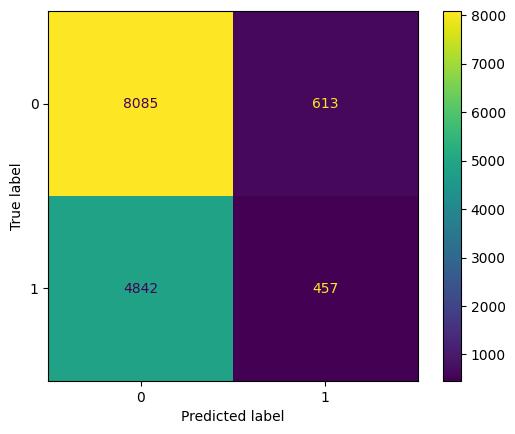

In [172]:
y_pred = model3.predict(X_train)
print(f"Precisión: {accuracy_score(y_train, y_pred) * 100:.2f}%")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_train, y_pred),
                              display_labels=model3.classes_)
disp.plot()
plt.show()

Test - Precisión: 61.47%
Test - Matriz de confusión


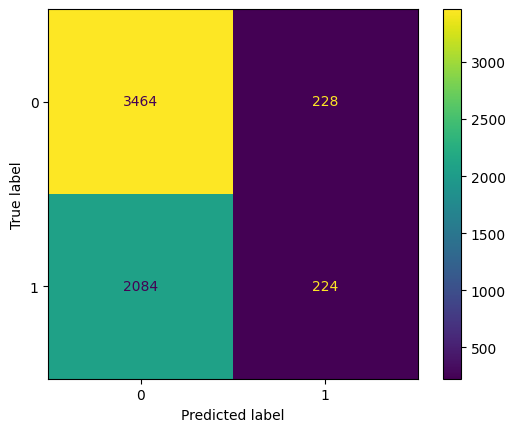

In [174]:
y_pred = model3.predict(X_test)
print(f"Test - Precisión: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Test - Matriz de confusión")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=model3.classes_)
disp.plot()
plt.show()

d) (0.75 pts) Explica qué variable parece influir más según el modelo.

In [167]:
lmc = model3.named_steps['lr'].coef_

# Plot for LM
objects = X.columns
y_pos = np.arange(len(objects))
coefficients = lmc[0]


fig = go.Figure()

# Agrego las trazas necesarias
fig.add_trace(
    go.Bar(
        x = coefficients,
        y = objects,
        name = "Coeficientes",
        orientation='h'
    )
)

# Actualizo el diseño
fig.update_layout(title = "GLM coefficients importance", xaxis_title = "Coeficientes normalizados", yaxis_title = "Variables")

# Muestro la figura
fig.show()

Parece que las variables que más influyen en determinar si una persona tiene un BMI saludable son protein_per_kg y Experience_Level

## Ejercicio 5 — Conclusión (1 punto)

En un máximo de 300 palabras, resume:

*   Qué hábitos parecen tener mayor relación con el estado de salud.

*   Qué modelo fue más eficaz y por qué.

*   Qué podrías mejorar si tuvieras más tiempo o datos.



El consumo de proteínas parece ser el factor que más influye en el estado de salud. Otras variables significativas como el nivel de experiencia, las calorías quemadas y la duración de las sesiones indican que el ejercicio físico es muy importante.

Parece que hay variables como el porcentaje de grasa o las calorías que están muy altamente correladas con el BMI. Por eso, el modelo lineal funciona muy bien con estos predictores. El random forest, al ser un modelo no lineal, se adapta mejor incluso a los datos de entrenamiento, aunque parece que tiene cierto overfitting y su precisión baja con los datos de test.

Habría que hacer un estudio más detallado de las variables y probar diferentes combinaciones de predictores y tipos de modelo para encontrar la solución óptima.